# UMAP on the fashion digits dataset

/Users/oscarmoxon/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/oscarmoxon/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


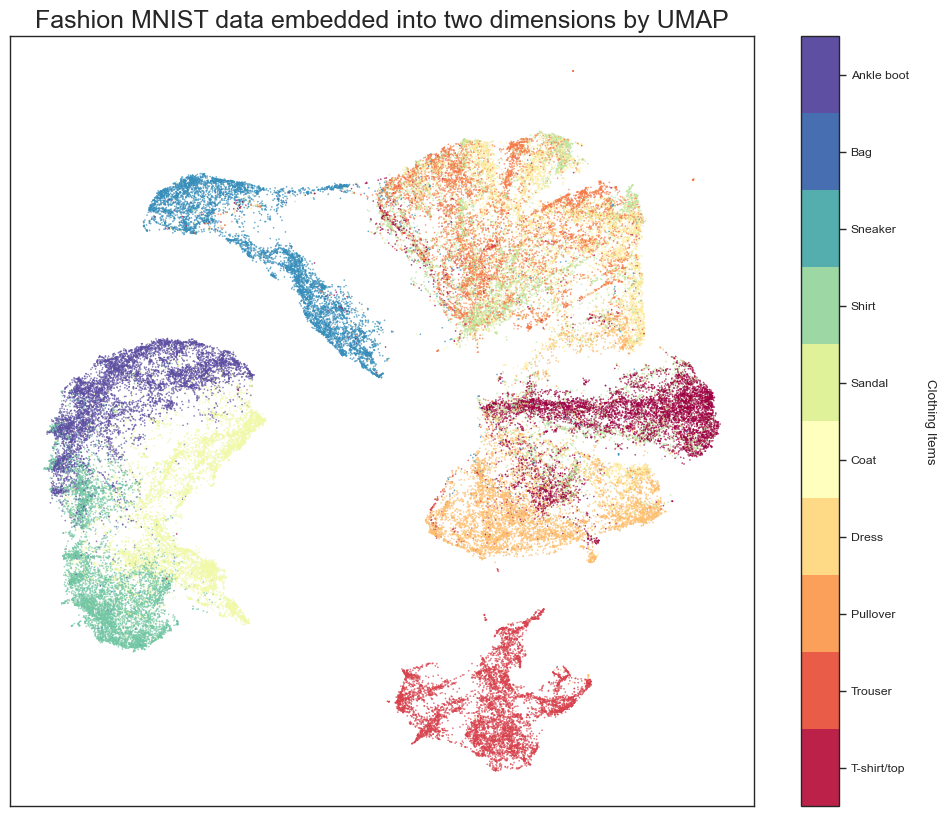

In [1]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors

sns.set(context="paper", style="white")

# Fetch the Fashion MNIST dataset
fashion_mnist = fetch_openml(name='Fashion-MNIST')

# Initialize UMAP
reducer = umap.UMAP(random_state=42, n_neighbors=5, min_dist=0.1)

# Fit and transform the dataset to reduce to 2 dimensions
embedding = reducer.fit_transform(fashion_mnist.data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=fashion_mnist.target.astype(int), cmap="Spectral", s=0.1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Fashion MNIST data embedded into two dimensions by UMAP", fontsize=18)

# Create a color map and norm object for discrete values
cmap = plt.cm.Spectral
bounds = np.arange(0, 11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Create a discrete color bar
cbar = plt.colorbar(scatter, cmap=cmap, norm=norm, boundaries=bounds, ticks=np.arange(0.5, 10.5), spacing='proportional')
cbar.set_ticklabels(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
cbar.set_label('Clothing Items', rotation=270, labelpad=20)

plt.show()

**Distinct Clusters**: 

Certain clothing items form distinct and separate clusters, indicating that their features are quite different from other items in the dataset. For example, items like 'Ankle boot', 'Sandal' and 'Sneaker' are overlapping. Their shapes and textures are unique compared to other clothing items, hence the gap between them and other clusters. 

**Overlapping Clusters**: 

Some clusters may overlap or be close to each other, such as 'Shirt', 'Coat', 'Pullover', and 'T-shirt/top'. 'Dress' is closest to 'T-shirt', which is perhaps related to their shape. This particular overlap suggests that these items share similar features, like sleevelessness with torso coverage, making them less distinct in the feature space.

**Relative Positioning**: 

The relative positioning of the clusters might give insight into the similarities between different clothing items. For instance, 'Trouser' is likely to be distant from 'Sandal' or 'Ankle boot' as trousers have a very different silhouette and texture.

**Noise and Outliers**: 

There may be points that do not clearly belong to any cluster or that are positioned far from their main cluster. These could be images that are not typical representations of their class (e.g., an unusual pose or style) or could be noisy data.

**Continuums**: 

Sometimes, you might notice a gradient or continuum of points between two clusters, suggesting a transition in the types of features that define those items. This could happen between items like 'Shirt' and 'Coat', where a variety of outerwear might share features with both categories.

**Class Separability**: 

The degree of separation between clusters can give an indication of how easy or difficult it might be for a classification model to distinguish between these classes.

**Model Performance Indicators**: 

If you use this visualization to interpret the performance of a classification model, tight and well-separated clusters would likely correspond to higher classification accuracy for those classes.